<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/SinNoise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Calculo de los datos de entrenamiento y validación
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  '''
    INPUT 
      dataset: time serie
      start_index: index of initial 
      end_index: index of end
      history_size: size of windows
      target_size
    OUTPUT:
      X:
      y: 
  '''

  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])

  X = np.array(data)
  y = np.array(labels)

  return X, y  

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)), loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)), val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.xticks(c='r')
    plt.yticks(c='r')
    plt.grid(True)


(5000,)


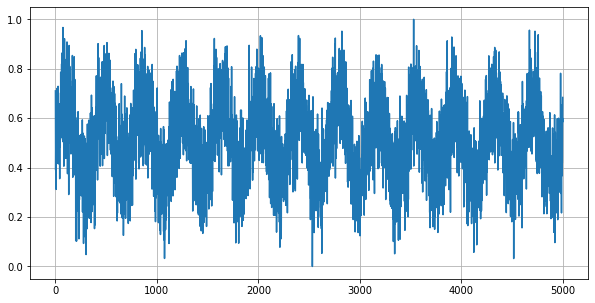

In [ ]:
rho = 1 
sr = 1
n = 5000
mu = 0
period = n/sr
time = np.linspace(0, period, n)
signal_pure = np.sin(2*np.pi*13*time) + 1 
timeSerie = signal_pure + np.random.normal(mu, rho * np.sqrt(sr/2), n)
timeSerie = (timeSerie - np.min(timeSerie)) / (np.max(timeSerie) - np.min(timeSerie))

#timeSerie = signal_pure
print(timeSerie.shape)

plt.figure(figsize=(10, 5))
plt.plot(timeSerie)
plt.grid()
plt.show()

In [ ]:
sizeTraining = int(np.round(len(timeSerie)*0.60))
sizeValid = int(np.round(len(timeSerie)*0.80))

sizeTraining, sizeValid

(3000, 4000)

In [ ]:
windows = 10
timeSerie_future_target = 0

# Conjunto de entrenamiento
X_train, y_train = univariate_data(timeSerie, 0, sizeTraining, windows, timeSerie_future_target)

# Conjunto de Validación
X_valid, y_valid = univariate_data(timeSerie, sizeTraining, sizeValid, windows, timeSerie_future_target)

# Conjunto de test
X_test, y_test = univariate_data(timeSerie, sizeValid, None, windows, timeSerie_future_target)

# Dimensiones de los conjuntos de entrenamiento y validación
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((2990, 10, 1), (2990,), (990, 10, 1), (990,), (990, 10, 1), (990,))

In [ ]:
X_train = np.squeeze(X_train)
X_valid = np.squeeze(X_valid)
X_test = np.squeeze(X_test)

X_train.shape, X_valid.shape, X_test.shape

((2990, 10), (990, 10), (990, 10))

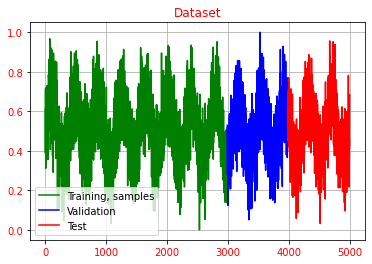

In [ ]:
plt.plot(time[0:X_train.shape[0]], timeSerie[0:X_train.shape[0]], 'g', label= 'Training, samples')
plt.plot(time[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0]], timeSerie[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0]], 'b', label= 'Validation')
plt.plot(time[X_train.shape[0]+X_valid.shape[0]:], timeSerie[X_train.shape[0]+X_valid.shape[0]:], 'r', label= 'Test')
plt.title('Dataset', c='r')
plt.xticks(c='r')
plt.yticks(c='r')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(X_train.shape[0], X_train.shape[1]), name='Entrada')     

h1 = tf.keras.layers.Dense(50,                        
                           activation='sigmoid',      
                           name='h1'                  
                          )(input)

h2 = tf.keras.layers.Dense(10,                        
                           activation='relu',      
                           name='h2'                  
                          )(h1)

output = tf.keras.layers.Dense(1, name='Output')(h2) 

model = tf.keras.Model(inputs=input, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 2990, 10)]        0         
_________________________________________________________________
h1 (Dense)                   (None, 2990, 50)          550       
_________________________________________________________________
h2 (Dense)                   (None, 2990, 10)          510       
_________________________________________________________________
Output (Dense)               (None, 2990, 1)           11        
Total params: 1,071
Trainable params: 1,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.05)
model.compile(loss="mse", 
              optimizer=optimizer,
              metrics=['mae', 'mse'])

history = model.fit(X_train, y_train,
                    epochs=20,       
                    batch_size=32,   
                    validation_data=(X_valid, y_valid) 
                    )

Epoch 1/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0535 - mae: 0.1533 - mse: 0.0535 - val_loss: 0.0268 - val_mae: 0.1319 - val_mse: 0.0268
Epoch 2/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0275 - mae: 0.1363 - mse: 0.0275 - val_loss: 0.0253 - val_mae: 0.1291 - val_mse: 0.0253
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0270 - mae: 0.1346 - mse: 0.0270 - val_loss: 0.0247 - val_mae: 0.1268 - val_mse: 0.0247
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0264 - mae: 0.1335 - mse: 0.0264 - val_loss: 0.0253 - val_mae: 0.1279 - val_mse: 0.0253
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0259 - mae: 0.1320 - mse: 0.0259 - val_loss: 0.0240 - val_mae: 0.1250 - val_mse: 0.0240
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0254 - mae: 0.1308 - mse: 0.0254 - val_loss: 0.0239 - val_mae: 0.1252 - val_mse: 0.0239
Epoch 7/20
94/94 [==========

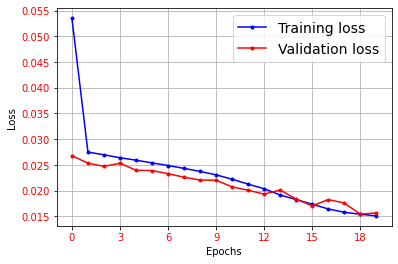

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
forecasting = model.predict(X_test)
forecasting.shape

(990, 1)

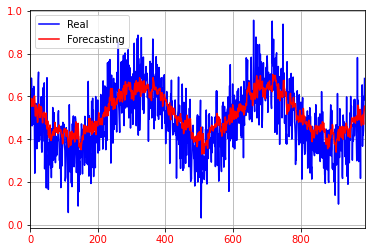

In [ ]:
plt.plot(y_test, c='b', label='Real')
plt.plot(forecasting, c='r', label='Forecasting')
plt.xlim(0,len(y_test))
plt.xticks(c='r')
plt.yticks(c='r')
plt.grid(True)
plt.legend()
plt.show()